Color at 0.7 percentile: #2D7DBB


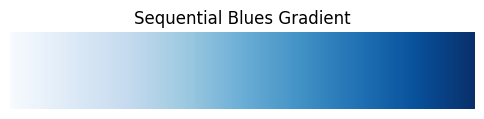

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Create a sequential blues colormap
cmap = plt.cm.get_cmap('Blues')

# Generate an array of values from 0 to 1
percentiles = np.linspace(0, 1, 101)  # 101 points for 0% to 100%

# Get the colors at the specified percentiles
colors = [cmap(p) for p in percentiles]

# Specify the percentile you're interested in
desired_percentile = 0.7

# Get the color code at the desired percentile
color_at_percentile = cmap(desired_percentile)

# Convert the color to its hexadecimal representation
hex_color = "#{:02X}{:02X}{:02X}".format(
    int(color_at_percentile[0] * 255),
    int(color_at_percentile[1] * 255),
    int(color_at_percentile[2] * 255)
)

print("Color at {} percentile: {}".format(desired_percentile, hex_color))

# Plot the colormap
gradient = np.linspace(0, 1, 256).reshape(1, -1)
gradient = np.vstack((gradient, gradient))

fig, ax = plt.subplots(figsize=(6, 1))
ax.set_title("Sequential Blues Gradient")
ax.imshow(gradient, aspect='auto', cmap=cmap)
ax.set_axis_off()

plt.show()

In [24]:
cmap = plt.cm.get_cmap('Blues')
color_at_percentile = cmap(0.9)
color_at_percentile

(0.03137254901960784, 0.2897347174163783, 0.570319108035371, 1.0)

In [1]:
import networkx as nx

In [9]:
G = nx.barabasi_albert_graph(10, 5)
degree, closeness, betweenness, pagerank = [], [], [], []
for node in G_nodes(G):
    degree.append((node["id"], node["degree"]))
    
degree = sorted(degree, key=lambda x: x[1], reverse=True)
print(degree)
rank = 1
now_score = degree[0][1]
for idx, (node, score) in enumerate(degree): 
    if now_score > score:
        now_score = score
        rank += 1
    degree[idx] = (node, rank)

print(degree)


[(0, 9), (6, 7), (7, 7), (8, 6), (9, 5), (1, 4), (2, 4), (3, 4), (4, 3), (5, 1)]
[(0, 1), (6, 2), (7, 2), (8, 3), (9, 4), (1, 5), (2, 5), (3, 5), (4, 6), (5, 7)]


In [70]:
for i in range(0, 19):
    print(i//(3+1))

0
0
0
1
1
1
2
2
2
3
3
3
4
4
4
5
5
5
6


In [52]:
for h_based, nodes in centrality.items():
    print(h_based, nodes)

degree [0, 6, 7, 8, 2, 9, 3, 4, 1, 5]
closeness [0, 6, 7, 2, 8, 9, 3, 4, 1, 5]
betweenness [0, 6, 8, 7, 9, 1, 2, 3, 4, 5]
page_rank [0, 6, 7, 8, 2, 9, 3, 4, 1, 5]


In [5]:
def G_nodes(G):

    degree = {node: degree for (node, degree) in G.degree()}
    closeness = {node: closeness for (node, closeness) in nx.closeness_centrality(G).items()}
    betweenness = {node: betweenness for (node, betweenness) in nx.betweenness_centrality(G).items()}
    pagerank = {node: pagerank for (node, pagerank) in nx.pagerank(G).items()}

    nodes = []
    for n in list(G.nodes()):
        nodes.append({
            "id": n, "degree": round(degree[n], 2), "closeness": round(closeness[n], 2), "betweenness": round(betweenness[n], 2), "pagerank": round(pagerank[n], 2), "display": "True",
        })

    # add a pesudo node as center node
    if len(list(nx.connected_components(G))) > 1:
        nodes.append({
            "id": -1, "degree": -1, "closeness": -1, "betweenness": -1, "pagerank": -1, "display": "False"
        })

    return nodes